## Importação de Bibliotecas e Análise Exploratória

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [53]:
df = pd.read_csv('slump_test.data', sep=',')
df.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


Primeiramente será feita a alteração das colunas do inglês para o português

In [54]:
colunas = ['No', 'Cimento', 'Escoria_Alto_Forno', 'Cinzas_Volantes', 'Agua', 'Superplastificante', 'Agregado_Graudo', 'Agregado_Miudo', 'SLUMP', 'FLOW', 'Resistencia_Compressao(28-dias)']
df.columns = colunas
df.head()

,No,Cimento,Escoria_Alto_Forno,Cinzas_Volantes,Agua,Superplastificante,Agregado_Graudo,Agregado_Miudo,SLUMP,FLOW,Resistencia_Compressao(28-dias)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   No                               103 non-null    int64  
 1   Cimento                          103 non-null    float64
 2   Escoria_Alto_Forno               103 non-null    float64
 3   Cinzas_Volantes                  103 non-null    float64
 4   Agua                             103 non-null    float64
 5   Superplastificante               103 non-null    float64
 6   Agregado_Graudo                  103 non-null    float64
 7   Agregado_Miudo                   103 non-null    float64
 8   SLUMP                            103 non-null    float64
 9   FLOW                             103 non-null    float64
 10  Resistencia_Compressao(28-dias)  103 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 9.0 KB


Não há nenhum valor nulo nesse dataset, não sendo necessário algum tratamento prévio dos dados.

Algumas colunas não fazem sentido para a análise, como Número de cada amostra, e as saídas Flow e Resistência a Compressão, mas ambas as saídas poderiam também ser analisadas em conjunto.

In [56]:
df.drop(['No','FLOW', 'Resistencia_Compressao(28-dias)'], axis=1, inplace=True)
df.tail()

,Cimento,Escoria_Alto_Forno,Cinzas_Volantes,Agua,Superplastificante,Agregado_Graudo,Agregado_Miudo,SLUMP
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5
102,348.7,0.1,223.1,208.5,9.6,786.2,758.1,29.0


In [57]:
df.corr().round(4)

,Cimento,Escoria_Alto_Forno,Cinzas_Volantes,Agua,Superplastificante,Agregado_Graudo,Agregado_Miudo,SLUMP
Cimento,1.0000,-0.2436,-0.4865,0.2211,-0.1064,-0.3099,0.0570,0.1459
Escoria_Alto_Forno,-0.2436,1.0000,-0.3226,-0.0268,0.3065,-0.2238,-0.1835,-0.2840
Cinzas_Volantes,-0.4865,-0.3226,1.0000,-0.2413,-0.1435,0.1726,-0.2829,-0.1186
Agua,0.2211,-0.0268,-0.2413,1.0000,-0.1555,-0.6022,0.1146,0.4666
Superplastificante,-0.1064,0.3065,-0.1435,-0.1555,1.0000,-0.1042,0.0583,-0.2129
Agregado_Graudo,-0.3099,-0.2238,0.1726,-0.6022,-0.1042,1.0000,-0.4885,-0.1882
Agregado_Miudo,0.0570,-0.1835,-0.2829,0.1146,0.0583,-0.4885,1.0000,0.2023
SLUMP,0.1459,-0.2840,-0.1186,0.4666,-0.2129,-0.1882,0.2023,1.0000


In [58]:
correlacao = df.corr()
correlacao['SLUMP'].sort_values(ascending=False)

SLUMP                 1.000000
Agua                  0.466568
Agregado_Miudo        0.202272
Cimento               0.145913
Cinzas_Volantes      -0.118621
Agregado_Graudo      -0.188157
Superplastificante   -0.212902
Escoria_Alto_Forno   -0.284037
Name: SLUMP, dtype: float64

Água é a variável que mais se correlaciona com o Slump do concreto, o que faz sentido, pois quanto mais água, mais trabalhavel o concreto tende a ser.

In [59]:
df.describe().round(2)

,Cimento,Escoria_Alto_Forno,Cinzas_Volantes,Agua,Superplastificante,Agregado_Graudo,Agregado_Miudo,SLUMP
count,103.00,103.00,103.00,103.00,103.00,103.00,103.00,103.00
mean,229.89,77.97,149.01,197.17,8.54,883.98,739.60,18.05
std,78.88,60.46,85.42,20.21,2.81,88.39,63.34,8.75
min,137.00,0.00,0.00,160.00,4.40,708.00,640.60,0.00
25%,152.00,0.05,115.50,180.00,6.00,819.50,684.50,14.50
50%,248.00,100.00,164.00,196.00,8.00,879.00,742.70,21.50
75%,303.90,125.00,235.95,209.50,10.00,952.80,788.00,24.00
max,374.00,193.00,260.00,240.00,19.00,1049.90,902.00,29.00


## Visualização dos Dados

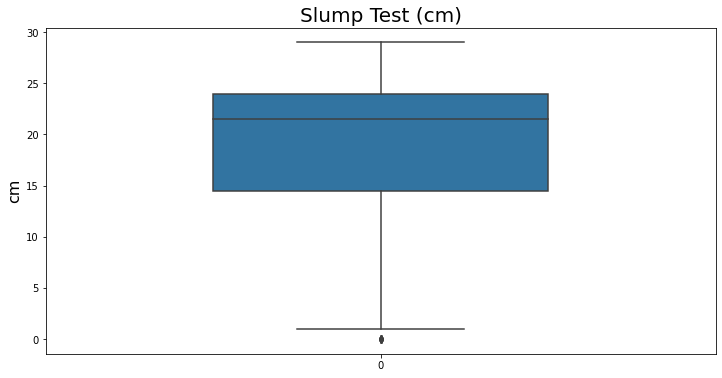

In [101]:
ax = sns.boxplot(data=df['SLUMP'], width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title("Slump Test (cm)", fontsize = 20)
ax.set_ylabel("cm", fontsize=16)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


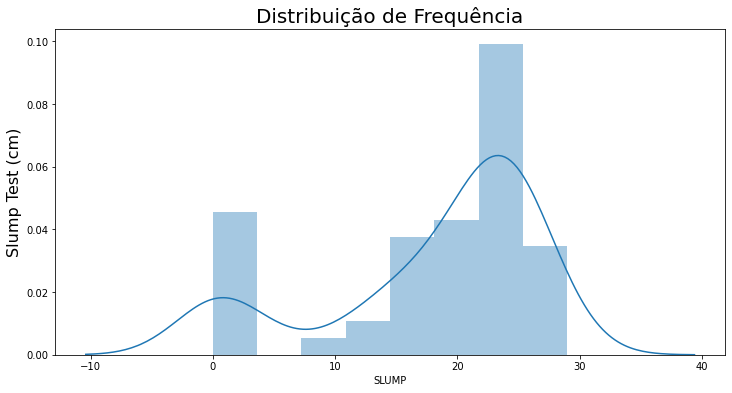

In [61]:
ax = sns.distplot(df["SLUMP"])
ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição de Frequência", fontsize = 20)
ax.set_ylabel("Slump Test (cm)", fontsize=16)
ax

A maior concentração do Slump está entre 15 até 25cm, como visto anteriormente pelo método describe.

Text(0.5, 1.1, 'Dispersão entre as variáveis')

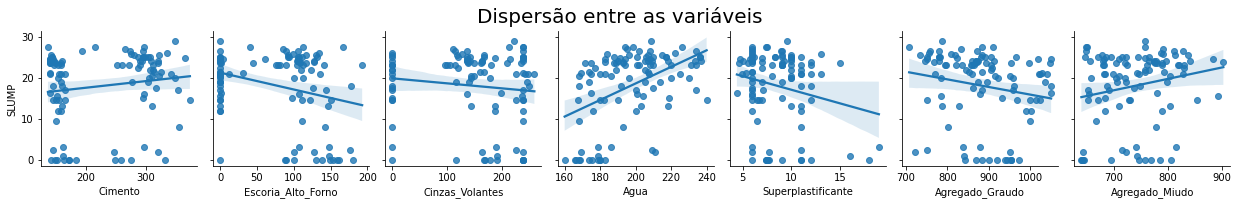

In [62]:
ax = sns.pairplot(df, y_vars = 'SLUMP', x_vars = ['Cimento', 'Escoria_Alto_Forno', 'Cinzas_Volantes', 'Agua', 'Superplastificante', 'Agregado_Graudo', 'Agregado_Miudo'], kind='reg')
ax.fig.suptitle("Dispersão entre as variáveis", fontsize = 20, y = 1.1)

Há poucas correlações significantemente positivas, e isso é um indício de que talvez um modelo utilizando Regressão Linear não seja o mais adequado de se usar.

## Regressão Linear

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# Definição da variável alvo
y = df['SLUMP']
y.sample(5)

54     20.5
38     19.0
51     21.0
31     20.0
101    27.5
Name: SLUMP, dtype: float64

In [65]:
# Definição das variáveis auxiliares
X = df.drop(["SLUMP"], axis=1)
X.sample(10)

,Cimento,Escoria_Alto_Forno,Cinzas_Volantes,Agua,Superplastificante,Agregado_Graudo,Agregado_Miudo
14,374.0,0.0,0.0,190.0,7.0,1013.0,730.0
92,303.8,0.2,239.8,236.4,8.3,780.1,715.3
24,142.0,130.0,167.0,174.0,11.0,883.0,785.0
27,295.0,106.0,136.0,208.0,6.0,871.0,650.0
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8
68,320.0,127.0,164.0,211.0,6.0,721.0,723.0
78,140.0,1.4,198.1,174.9,4.4,1049.9,780.5
53,309.0,0.0,142.0,218.0,10.0,912.0,680.0
102,348.7,0.1,223.1,208.5,9.6,786.2,758.1
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [67]:
print(X_train.shape)
print(X_test.shape)

(72, 7)
(31, 7)


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [69]:
modelo = LinearRegression()

In [70]:
modelo.fit(X_train, y_train)

LinearRegression()

### Coeficiente de determinação R²

In [71]:
print("R² = {}".format(modelo.score(X_train, y_train).round(2)))

R² = 0.31


In [72]:
y_previsto = modelo.predict(X_test)

In [73]:
y_previsto

array([19.15907473, 14.83854888, 14.8668275 , 22.28022601, 19.53776123,
       15.58489489, 20.16617601, 15.82935141, 13.2730583 , 16.94869744,
       25.59316184, 20.8146193 ,  9.66877624, 13.0815568 , 17.74257604,
       26.37375773, 17.81395388, 14.8782197 , 16.51060983, 15.44175934,
       25.74727938, 22.8648761 , 26.58973975, 18.03426927, 15.07362017,
       14.86299285, 16.71825486, 11.93382349, 12.03255274, 19.46360809,
        8.13776197])

In [74]:
print("R² = %s" % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.22


O R² ficou muito abaixo do ideal (quanto mais próximo de 1, melhor). <br>
Como alternativa será feita uma segunda análise nos dados e definição de outras abordagens.

## Visualização - Parte 2

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

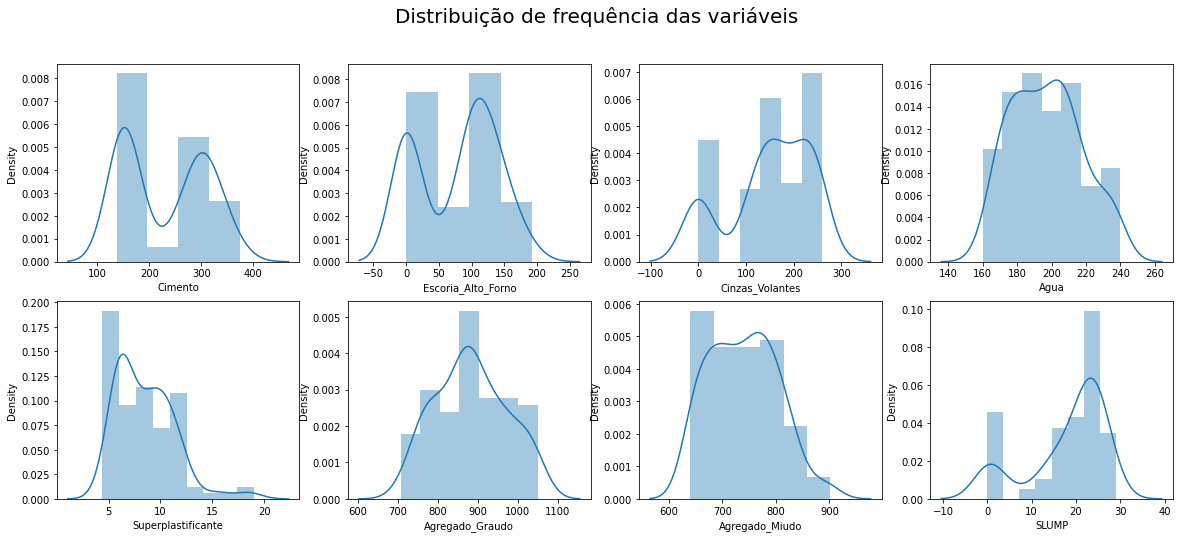

In [75]:
fig, ax = plt.subplots(2, 4, sharex=False, figsize=(20,8))
fig.suptitle("Distribuição de frequência das variáveis", fontsize=20)

sns.distplot(df['Cimento'], ax=ax[0, 0], kde=True)
sns.distplot(df['Escoria_Alto_Forno'], ax=ax[0, 1], kde=True)
sns.distplot(df['Cinzas_Volantes'], ax=ax[0, 2], kde=True)
sns.distplot(df['Agua'], ax=ax[0, 3], kde=True)
sns.distplot(df['Superplastificante'], ax=ax[1, 0], kde=True)
sns.distplot(df['Agregado_Graudo'], ax=ax[1, 1], kde=True)
sns.distplot(df['Agregado_Miudo'], ax=ax[1, 2], kde=True)
sns.distplot(df['SLUMP'], ax=ax[1, 3], kde=True)

Pelas variáveis se mostrarem muito independentes será feita uma abordagem de categorização do slump.

### Categorização da saída

Como alternativa, será categorizada a saída da seguinte forma: <br>
Utilizando o método qcut(), será criado 4 intervalos de valores de Slump, e renomeados de acordo com esse intervalo, indicando um concreto mais rígido até um mais trabalhável.

In [76]:
df['Interval'] = pd.qcut(df['SLUMP'], q = 4)
df['Classificacao'] = pd.qcut(df['SLUMP'], q = 4, labels=['rígido', 'medio-baixo', 'medio', 'trabalhavel'])
df.sample(10)

,Cimento,Escoria_Alto_Forno,Cinzas_Volantes,Agua,Superplastificante,Agregado_Graudo,Agregado_Miudo,SLUMP,Interval,Classificacao
57,313.0,124.0,0.0,205.0,11.0,846.0,758.0,22.0,"(21.5, 24.0]",medio
23,146.0,178.0,0.0,192.0,11.0,961.0,749.0,18.0,"(14.5, 21.5]",medio-baixo
93,172.0,162.1,238.5,166.0,7.4,953.3,641.4,0.0,"(-0.001, 14.5]",rígido
82,160.2,0.3,240.0,233.5,9.2,781.0,841.1,24.0,"(21.5, 24.0]",medio
26,308.0,111.0,142.0,217.0,10.0,783.0,686.0,25.0,"(24.0, 29.0]",trabalhavel
94,172.8,158.3,239.5,166.4,7.4,952.6,644.1,0.0,"(-0.001, 14.5]",rígido
17,295.0,106.0,136.0,206.0,11.0,750.0,766.0,25.0,"(24.0, 29.0]",trabalhavel
40,145.0,177.0,227.0,209.0,11.0,752.0,715.0,2.5,"(-0.001, 14.5]",rígido
8,152.0,0.0,237.0,204.0,6.0,785.0,892.0,15.5,"(14.5, 21.5]",medio-baixo
71,313.0,112.0,0.0,220.0,10.0,794.0,789.0,23.0,"(21.5, 24.0]",medio


In [77]:
y2 = df['Classificacao']

## KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
modelo_knn = KNeighborsClassifier(5)

In [80]:
modelo_knn.fit(X, y2)

KNeighborsClassifier()

In [81]:
modelo_knn.score(X, y2)

0.5631067961165048

Determinando valor ideal de K

In [82]:
valores = np.arange(3, 30, 2)

for i in valores:
  modelo_knn = KNeighborsClassifier(i)
  modelo_knn.fit(X, y2)
  print("Para K = {}, acurácia de {}".format(i, modelo_knn.score(X, y2).round(4)))

Para K = 3, acurácia de 0.5922
Para K = 5, acurácia de 0.5631
Para K = 7, acurácia de 0.5437
Para K = 9, acurácia de 0.5243
Para K = 11, acurácia de 0.5146
Para K = 13, acurácia de 0.5243
Para K = 15, acurácia de 0.4951
Para K = 17, acurácia de 0.4854
Para K = 19, acurácia de 0.5049
Para K = 21, acurácia de 0.4854
Para K = 23, acurácia de 0.4757
Para K = 25, acurácia de 0.4369
Para K = 27, acurácia de 0.3981
Para K = 29, acurácia de 0.4272


O valor ideal de K para esse algoritmo é 3, gerando uma acurácia de 59%

### Validação por Cross-Validation

O modelo anterior utilizou todos os dados para fazer o treinamento e teste. <br>
Isso não é o ideal pois pode gerar overfitting. Será feita a análise utilizando o K-Fold Cross Validation

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
modelo_knn = KNeighborsClassifier(3).fit(X, y2)

In [85]:
cv_scores = cross_val_score(modelo_knn, X, y2, cv=6)

In [86]:
print(cv_scores)
print("cv_scores mean {} (+/- {})".format(np.mean(cv_scores).round(4), cv_scores.std().round(4)))

[0.61111111 0.17647059 0.35294118 0.23529412 0.64705882 0.64705882]
cv_scores mean 0.445 (+/- 0.1974)


Mesmo utilizando o cross validation a acurácia teve um desempenho muito abaixo de um modelo minimamente razoável. <br>
Como alternativa será testado outro tipo de algoritmo.

## Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegressionCV

Modelo de Logistic Regression já com Cross Validation imbutido

In [109]:
modelo_lr = LogisticRegressionCV(random_state = 0, cv=10, max_iter = 1000)

In [110]:
modelo_lr.fit(X, y2)

LogisticRegressionCV(cv=10, max_iter=1000, random_state=0)

In [111]:
modelo_lr.score(X, y2)

0.5922330097087378

Acurácia para esse modelo demonstrou ter um desempenho melhor do que o KNN, porém ainda não chega a ser o ideal para um modelo de predição.

## SVM

In [112]:
from sklearn import svm

In [113]:
modelo_svm = svm.SVC()

In [114]:
modelo_svm.fit(X, y2)

SVC()

In [115]:
modelo_svm.score(X, y2)

0.4174757281553398

## Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [149]:
modelo_dt = DecisionTreeClassifier(max_depth = 5)

In [150]:
modelo_dt.fit(X, y2)

DecisionTreeClassifier(max_depth=5)

In [151]:
cv_scores_dt = cross_val_score(modelo_dt, X, y2, cv=10)

In [152]:
print(cv_scores_dt)
print('cv_scores mean: {} (+/- {})'.format(np.mean(cv_scores_dt).round(4), cv_scores_dt.std().round(4)))

[0.45454545 0.36363636 0.36363636 0.2        0.4        0.2
 0.1        0.5        0.8        0.6       ]
cv_scores mean: 0.3982 (+/- 0.1964)


## Resultados Obtidos

Foi identificado que a variável que mais tem correlação com o SLUMP é a água, outras variáveis com correlações positivas são: cimento e agregado miudo (areia), que são componentes fundamentais para se produzir o concreto. <br>
<hr>
A tentativa foi a criação de um modelo de machine learning que conseguisse predizer qual o resultado de SLUMP de um concreto com base na dosagem de seus componentes de produção. <br>
Para isso foi categorizada a saída e utilizado 3 algoritmos: KNN, SVM, Logistic Regression e Decision Tree, sendo a Logistic Regression o que demonstrou a melhor acurácia, porém ainda não significativa para um modelo ideal de predição.
<hr>
Talvez seja possível obter melhores resultados em um dataset com mais amostas, e lembrando que os dados foram extraídos de um dataset produzido na China, que possívelmente possui suas próprias normas técnicas para a produção do concreto e realização do Slump Test, por isso seria interessante uma análise também com dados extraídos no Brasil, mas para fins de estudo foi uma análise proveitosa.